In [1]:
# 主要内容
# 1、Logistic Regression
# 2、Decision Tree
# 3、神经网络
# 4、基于聚类的离群点检测

In [2]:
# logistic regression

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
from sklearn.linear_model import LogisticRegression as LR
from sklearn.linear_model import RandomizedLogisticRegression as RLR

data = pd.read_excel('/home/jeff/python_data/chapter5/chapter5/demo/data/bankloan.xls')
data
x = data.iloc[:,:8].as_matrix()
y = data.iloc[:,8].as_matrix()

rlr = RLR()
rlr.fit(x, y)
rlr.get_support()
print('通过随机逻辑回归模型筛选特征结束。')
print('有效特征为：%s' %','.join(data.iloc[:,:8].columns[rlr.get_support()]))
x = data[data.iloc[:,:8].columns[rlr.get_support()]].as_matrix()

lr = LR()
lr.fit(x, y)
print('逻辑回归模型训练结束。')
print('模型平均正确率为：%s' % lr.score(x,y)) 

通过随机逻辑回归模型筛选特征结束。
有效特征为：工龄,地址,负债率,信用卡负债
逻辑回归模型训练结束。
模型平均正确率为：0.814285714286


In [9]:
# Decision Tree

import pandas as pd

data = pd.read_excel('/home/jeff/python_data/chapter5/chapter5/demo/data/sales_data.xls', index_col='序号')

data[data=='好'] = 1
data[data=='是'] = 1
data[data=='高'] = 1
data[data!=1] = -1
x = data.iloc[:,:3].as_matrix().astype(int)
y = data.iloc[:,3].as_matrix().astype(int)

from sklearn.tree import DecisionTreeClassifier as DTC
dtc = DTC(criterion = 'entropy')
dtc.fit(x, y)

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

with open("tree.dot", 'w') as f:
    f = export_graphviz(dtc, feature_names = data.columns[:3], out_file = f)
    
# 之后去命令行下操作
# 1、修改tree.dot文件，加入"edge[fontname="SimHei"]; node[fontname="SimHei"]"
# 2、用graphviz生成图片
# + dot -Tpdf tree.dot -o tree.pdf
# + dot -Tpng tree.dot -o tree.png



from PIL import Image
img=Image.open('tree.png')
img.show()

In [3]:
# 神经网络

import pandas as pd

data = pd.read_excel('/home/jeff/python_data/chapter5/chapter5/demo/data/sales_data.xls', index_col = '序号')
data[data=='好'] = 1
data[data=='是'] = 1
data[data=='高'] = 1
data[data!=1] = 0
x = data.iloc[:,:3].as_matrix().astype(int)
y = data.iloc[:,3].as_matrix().astype(int)

from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential() # 建立模型
model.add(Dense(10,input_dim=3, activation='relu'))
#model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
#model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', class_mode = 'binary')
model.fit(x, y, nb_epoch = 1000, batch_size = 10)
yp = model.predict_classes(x).reshape(len(y))

Using TensorFlow backend.
/home/jeff/anaconda3/lib/python3.5/site-packages/keras/models.py:546: UserWarning: "class_mode" argument is deprecated, please remove it.
  warnings.warn('"class_mode" argument is deprecated, '


Epoch 1/1000
34/34 [==============================] - 0s - loss: 0.6515     
Epoch 2/1000
34/34 [==============================] - 0s - loss: 0.6485     
Epoch 3/1000
34/34 [==============================] - 0s - loss: 0.6467     
Epoch 4/1000
34/34 [==============================] - 0s - loss: 0.6447     
Epoch 5/1000
34/34 [==============================] - 0s - loss: 0.6428     
Epoch 6/1000
34/34 [==============================] - 0s - loss: 0.6406     
Epoch 7/1000
34/34 [==============================] - 0s - loss: 0.6393     
Epoch 8/1000
34/34 [==============================] - 0s - loss: 0.6371     
Epoch 9/1000
34/34 [==============================] - 0s - loss: 0.6358     
Epoch 10/1000
34/34 [==============================] - 0s - loss: 0.6335     
Epoch 11/1000
34/34 [==============================] - 0s - loss: 0.6322     
Epoch 12/1000
34/34 [==============================] - 0s - loss: 0.6306     
Epoch 13/1000
34/34 [==============================] - 0s - loss: 0.6295 

In [30]:
data[data!=1] = 0
result = pd.DataFrame()
result['true_value'] = data['销量']
result['predict_value'] = yp
result['correct'] = result.true_value == result.predict_value
ratio = result['correct'].value_counts()[1]/result['correct'].value_counts().sum()
print('准确率为：', ratio)
print(result)

准确率为： 0.764705882353
   true_value  predict_value correct
序号                                  
1           1              1    True
2           1              1    True
3           1              1    True
4           1              0   False
5           1              1    True
6           1              0   False
7           1              0   False
8           1              1    True
9           1              1    True
10          1              1    True
11          1              1    True
12          1              1    True
13          1              1    True
14          0              1   False
15          1              1    True
16          1              1    True
17          1              1    True
18          1              1    True
19          1              0   False
20          0              0    True
21          0              0    True
22          0              0    True
23          0              0    True
24          0              0    True
25          0    

In [43]:
# K-means 聚类

import pandas as pd

k = 3 # 聚类的类别
iteration = 500 # 最大循环次数
data = pd.read_excel('/home/jeff/python_data/chapter5/chapter5/demo/data/consumption_data.xls')
data_zs = 1.0 * (data - data.min())/data.std()

from sklearn.cluster import KMeans
model = KMeans(n_clusters = k, n_jobs = 4, max_iter = iteration)
model.fit(data_zs)

# 统计结果
r1 = pd.Series(model.labels_).value_counts()
r2 = pd.DataFrame(model.cluster_centers_)
r = pd.concat([r2, r1], axis = 1)
r.columns = list(data.columns) + ['类别数目']
print(r)

# 详细结果
r = pd.concat([data, pd.Series(model.labels_, index = data.index)], axis = 1)
r.columns = list(data.columns) + ['聚类类别']
print(r)

         Id         R         F         M  类别数目
0  2.579224  1.253161  0.552872  1.201873   298
1  2.030509  1.198245  2.392960  1.941550   292
2  0.749849  1.286122  0.691471  1.254731   350
      Id   R   F        M  聚类类别
0      1  27   6   232.61     2
1      2   3   5  1507.11     2
2      3   4  16   817.62     2
3      4   3  11   232.81     2
4      5  14   7  1913.05     2
5      6  19   6   220.07     2
6      7   5   2   615.83     2
7      8  26   2  1059.66     2
8      9  21   9   304.82     2
9     10   2  21  1227.96     1
10    11  15   2   521.02     2
11    12  26   3   438.22     2
12    13  17  11  1744.55     2
13    14  30  16  1957.44     2
14    15   5   7  1713.79     2
15    16   4  21  1768.11     1
16    17  93   2  1016.34     2
17    18  16   3   950.36     2
18    19   4   1   754.93     2
19    20  27   1   294.23     2
20    21   5   1   195.30     2
21    22  17   3  1845.34     2
22    23  12  13  1434.29     2
23    24  21   3   275.85     2
24    25

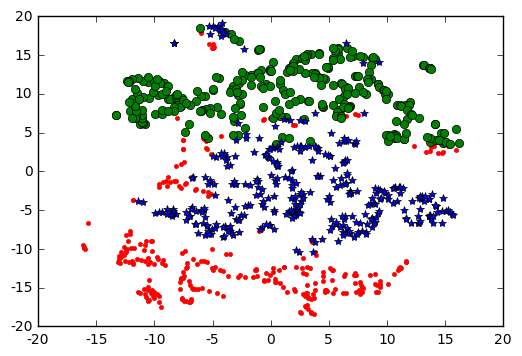

In [48]:
# 通过tsne进行降维可视化

from sklearn.manifold import TSNE

tsne = TSNE()
tsne.fit_transform(data_zs)
tsne = pd.DataFrame(tsne.embedding_, index = data_zs.index)

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

d = tsne[r['聚类类别']==0]
plt.plot(d[0], d[1], 'r.')

d = tsne[r['聚类类别']==1]
plt.plot(d[0], d[1], 'go')

d = tsne[r['聚类类别']==2]
plt.plot(d[0], d[1], 'b*')

plt.show()

In [58]:
# Apriori 挖掘关联规则

import pandas as pd

#自定义连接函数，用于实现L_{k-1}到C_k的连接
def connect_string(x, ms):
  x = list(map(lambda i:sorted(i.split(ms)), x))
  l = len(x[0])
  r = []
  for i in range(len(x)):
    for j in range(i,len(x)):
      if x[i][:l-1] == x[j][:l-1] and x[i][l-1] != x[j][l-1]:
        r.append(x[i][:l-1]+sorted([x[j][l-1],x[i][l-1]]))
  return r

#寻找关联规则的函数
def find_rule(d, support, confidence, ms = '--'):
  result = pd.DataFrame(index=['support', 'confidence']) #定义输出结果
  
  support_series = 1.0*d.sum()/len(d) #支持度序列
  column = list(support_series[support_series > support].index) #初步根据支持度筛选
  k = 0
  
  while len(column) > 1:
    k = k+1
    print(u'\n正在进行第%s次搜索...' %k)
    column = connect_string(column, ms)
    print(u'数目：%s...' %len(column))
    sf = lambda i: d[i].prod(axis=1, numeric_only = True) #新一批支持度的计算函数
    
    #创建连接数据，这一步耗时、耗内存最严重。当数据集较大时，可以考虑并行运算优化。
    d_2 = pd.DataFrame(list(map(sf,column)), index = [ms.join(i) for i in column]).T
    
    support_series_2 = 1.0*d_2[[ms.join(i) for i in column]].sum()/len(d) #计算连接后的支持度
    column = list(support_series_2[support_series_2 > support].index) #新一轮支持度筛选
    support_series = support_series.append(support_series_2)
    column2 = []
    
    for i in column: #遍历可能的推理，如{A,B,C}究竟是A+B-->C还是B+C-->A还是C+A-->B？
      i = i.split(ms)
      for j in range(len(i)):
        column2.append(i[:j]+i[j+1:]+i[j:j+1])
    
    cofidence_series = pd.Series(index=[ms.join(i) for i in column2]) #定义置信度序列
 
    for i in column2: #计算置信度序列
      cofidence_series[ms.join(i)] = support_series[ms.join(sorted(i))]/support_series[ms.join(i[:len(i)-1])]
    
    for i in cofidence_series[cofidence_series > confidence].index: #置信度筛选
      result[i] = 0.0
      result[i]['confidence'] = cofidence_series[i]
      result[i]['support'] = support_series[ms.join(sorted(i.split(ms)))]
  
  result = result.T.sort_values(['confidence','support'], ascending = False) #结果整理，输出
  print(u'\n结果为：')
  print(result)
  
  return result

In [60]:
import pandas as pd

data = pd.read_excel('/home/jeff/python_data/chapter5/chapter5/demo/data/menu_orders.xls', header = None)
print(data)
print('转换原始数据为0-1矩阵')
ct = lambda x : pd.Series(1, index = x[pd.notnull(x)])
b = map(ct, data.as_matrix())
data = pd.DataFrame(list(b)).fillna(0)
print('转换完毕')
del b
print(data) # 数据格式对齐

support = 0.2 # 最小支持度
confidence = 0.5 # 最小置信度
ms = '---' # 连接符
result = find_rule(data, support, confidence, ms)

   0  1    2    3
0  a  c    e  NaN
1  b  d  NaN  NaN
2  b  c  NaN  NaN
3  a  b    c    d
4  a  b  NaN  NaN
5  b  c  NaN  NaN
6  a  b  NaN  NaN
7  a  b    c    e
8  a  b    c  NaN
9  a  c    e  NaN
转换原始数据为0-1矩阵
转换完毕
     a    b    c    d    e
0  1.0  0.0  1.0  0.0  1.0
1  0.0  1.0  0.0  1.0  0.0
2  0.0  1.0  1.0  0.0  0.0
3  1.0  1.0  1.0  1.0  0.0
4  1.0  1.0  0.0  0.0  0.0
5  0.0  1.0  1.0  0.0  0.0
6  1.0  1.0  0.0  0.0  0.0
7  1.0  1.0  1.0  0.0  1.0
8  1.0  1.0  1.0  0.0  0.0
9  1.0  0.0  1.0  0.0  1.0

正在进行第1次搜索...
数目：6...

正在进行第2次搜索...
数目：3...

正在进行第3次搜索...
数目：0...

结果为：
           support  confidence
e---a          0.3    1.000000
e---c          0.3    1.000000
c---e---a      0.3    1.000000
a---e---c      0.3    1.000000
a---b          0.5    0.714286
c---a          0.5    0.714286
a---c          0.5    0.714286
c---b          0.5    0.714286
b---a          0.5    0.625000
b---c          0.5    0.625000
b---c---a      0.3    0.600000
a---c---b      0.3    0.600000
a---b---c   

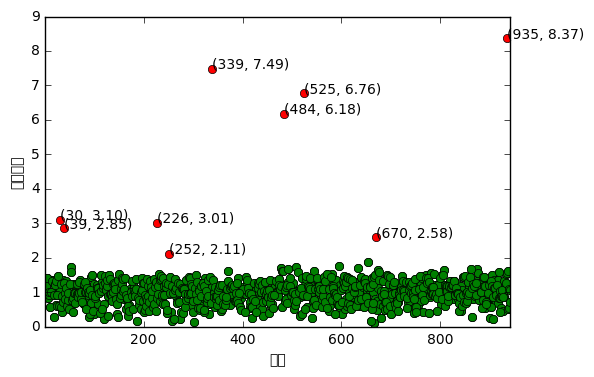

In [72]:
# s使用K-Means聚类检测离群点

import numpy as np
import pandas as pd

k = 3 # 聚类类别
iteration = 500 # 最大循环次数
threshold = 2 # 离散点阈值

data = pd.read_excel('/home/jeff/python_data/chapter5/chapter5/demo/data/consumption_data.xls', index_col='Id')
data_zs = (data - data.min())/data.std()

from sklearn.cluster import KMeans
model = KMeans(n_clusters = k, n_jobs = 4, max_iter = iteration)
model.fit(data_zs)

r = pd.concat([data_zs, pd.Series(model.labels_, index = data_zs.index)], axis = 1)
r.columns = list(data_zs.columns) + ['聚类类别']

norm = []
for i in range(k):
    norm_tmp = r[['R', 'F', 'M']][r['聚类类别']==i] - model.cluster_centers_[i]
    norm_tmp = norm_tmp.apply(np.linalg.norm, axis = 1) # 求出绝对距离
    norm.append(norm_tmp/norm_tmp.median()) # 求相对距离并添加
    

norm = pd.concat(norm) # 合并

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
norm[norm < threshold].plot(style = 'go') # 正常点

discrete_points = norm[norm > threshold] # 离群点
discrete_points.plot(style = 'ro')

for i in range(len(discrete_points)): # 离群点做标记
    id = discrete_points.index[i]
    n = discrete_points.iloc[i]
    plt.annotate('(%s, %0.2f)' % (id, n), xy = (id, n), xytext = (id, n))

plt.xlabel('编号')
plt.ylabel('相对距离')
plt.show()    